<a href="https://colab.research.google.com/github/chayanondevv/2110640-INFO-SECURITY/blob/main/Assignment_Fundamental_of_Cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overviews**

In this activity, we will learn the basics of encryption. There are 3 exercises in this activity.
Each exercise is designed to let you learn the concepts of cryptography.

We will need:
* Imagemagick
* OpenSSL
* One of your favorite programming languages.

You are welcome to do this exercise with any programming language. If you have no
preference, use python.


1.(Cryptanalysis) Though encryption is primarily designed to preserve confidentiality
and integrity of data, the mechanism itself is vulnerable to brute force (statistical
analysis). In other words, the more we see the encrypted data, the easier we can
hack it. In this exercise, you are asked to crack the following cipher text. Please
provide the decrypted result and explain your strategy in decrypting this text.


**Cipher text**

PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU
BROJZK MOLTROE.

a. Count the frequency of letters. List the top three most frequent characters.

    1.   P -> 7
    2.   R -> 6
    3.   O -> 6
    4.   F -> 6


b. Knowing that this is English, what are commonly used three-letter words and
two-letter words. Does the knowledge give you a hint on cracking the given
text?

common letters word in English

**two-letter**

    ref: https://byjus.com/english/two-letter-words-in-english/

    Am,As,Is,In,On,Of,At,Be,Do,To

**three-letter**

    ref: https://byjus.com/english/3-letter-words#:~:text=What%20are%20the%20most%20common,%2C%20can%2C%20you%2C%20etc.

    man, are, was, she, her, his, can, has, had, any, all, out, for, the, and, can, you

c. Cracking the given text. Measure the time that you have taken to crack this
message.

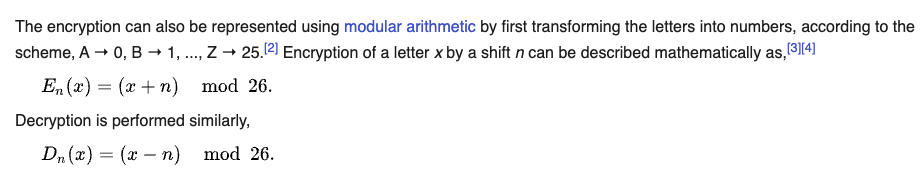

ref: https://en.wikipedia.org/wiki/Caesar_cipher

**Cipher text**

PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU
BROJZK MOLTROE.

Caesar shift + 3 ,

SUFVRITA **IS** TGU DIRST FCVSU OD MISDORTVNU. **TGIS** **IS** CN OLX EURMCN PROWURH.

    F -> I

    P -> S

    Q -> T
  
    D -> H

PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU
BROJZK MOLTROE.

**S**RCSO**IT**X **IS** **TH**R A**I**O**ST** CZS**S**R LA J**IS**ALO**T**SKR. **THIS** **IS** ZK LIU
BROJZK MOLTROE.

    R -> E
  
**SE**CSO**IT**X **IS** **THE** A**I**O**ST** CZS**SE** LA J**IS**ALO**T**SK**E**. **THIS** **IS** ZK LIU
B**E**OJZK MOLT**E**OE.

    A -> F

    O -> R

**SE**CS**RIT**X **IS** **THE** **FIRST** CZS**SE** L**F** J**ISF**L**RT**SK**E**. **THIS** **IS** ZK LIU
B**ER**JZK M**R**LT**ER**E.

    L -> O

**SE**CS**RIT**X **IS** **THE** **FIRST** CZS**SE** **OF** J**ISFORT**SK**E**. **THIS** **IS** ZK **O**IU
B**ER**JZK M**RO**T**ER**E.

    C -> C

    Z -> A

    S -> U

**SECURIT**X **IS** **THE** **FIRST** **CAUSE** **OF** J**ISFORTU**K**E**. **THIS** **IS** **A**K **O**IU
B**ER**J**A**K M**RO**T**ER**E.

    X -> Y

    K -> N

**SECURITY** **IS** **THE** **FIRST** **CAUSE** **OF** J**ISFORTUNE**. **THIS** **IS** **AN** **O**IU
B**ER**J**AN** M**RO**T**ER**E.

    J -> M

**SECURITY** **IS** **THE** **FIRST** **CAUSE** **OF** **MISFORTUNE**. **THIS** **IS** **AN** **O**IU
B**ERMAN** M**RO**T**ER**E.

    I -> L

    U -> D

    B -> G

**SECURITY** **IS** **THE** **FIRST** **CAUSE** **OF** **MISFORTUNE**. **THIS** **IS** **AN** **OLD**
**GERMAN** M**RO**T**ER**E.

    M -> P

    T -> V

    E -> B

**SECURITY** **IS** **THE** **FIRST** **CAUSE** **OF** **MISFORTUNE**. **THIS** **IS** **AN** **OLD**
**GERMAN** **PROVERB**.

I take about 1 hour to crack this message.



d. Create a simple python program for cracking the Caesar cipher text using
brute force attack. Explain the design and demonstrate your software.
(You may use an English dictionary for validating results.)

In [ ]:
import requests

def caesar_cipher(text, shift, decrypt=False):
    if decrypt:
        shift = -shift

    result = ""

    for char in text:
        if char.isalpha():
            if char.isupper():
                shifted = ((ord(char) - ord('A') + shift) % 26) + ord('A')
                result += chr(shifted)
            else:
                shifted = ((ord(char) - ord('a') + shift) % 26) + ord('a')
                result += chr(shifted)
        else:
            result += char

    return result

def auto_decrypt_caesar(ciphertext):
    results = {}

    for shift in range(1, 26):
        decrypted = caesar_cipher(ciphertext, shift, decrypt=True)
        results[shift] = decrypted

    return results

def load_dictionary(url="https://inventwithpython.com/dictionary.txt"):
    response = requests.get(url)
    words = response.text.splitlines()
    return set(word.upper() for word in words)

def find_best_decrypt(ciphertext):
    common_words = load_dictionary()
    best_score = 0
    best_shift = 0
    best_text = ""

    for shift in range(1, 26):
        decrypted = caesar_cipher(ciphertext, shift, decrypt=True)

        words = decrypted.upper().split()
        score = sum(1 for word in words if word.strip('.,!?;:') in common_words)

        if score > best_score:
            best_score = score
            best_shift = shift
            best_text = decrypted

    return best_shift, best_text

if __name__ == "__main__":
    original_cipher = "PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE."

    print("=== CAESAR CIPHER PROGRAM ===\n")

    print("Original ciphertext:")
    print(original_cipher)
    print()

    best_shift, decrypted_text = find_best_decrypt(original_cipher)

    print(f"Best decryption (shift {best_shift}):")
    print(decrypted_text)
    print()

    results = auto_decrypt_caesar(original_cipher)
    print("\nAll possible decryptions:")
    for shift, decrypted in results.items():
        print(f"Shift {shift:2d}: {decrypted}")

This code is a Caesar cipher cracker: it defines a function to shift letters for encryption or decryption, tries all 25 possible shifts, checks each result against an English dictionary to score how many valid words appear, and then picks the most likely plaintext while also displaying every possible decryption for comparison.

2.(Cryptanalysis on Symmetric Encryption) Vigenère is a complex version of the
Caesar cipher. It is a polyalphabetic substitution.

**Purpose**

To break the Vigenère cipher or other polyalphabetic ciphers without knowing the key in advance.

**Key Principle**

Repeated sequences in the ciphertext suggest that the key length may divide the distance (gap) between repetitions.

**Steps**

1. Identify repeated sequences of 3 or more characters in the ciphertext.

2. Measure the distance (gap) between occurrences of the repeated sequences.

3. Find the factors of these gaps to determine possible key lengths.

4. Divide the ciphertext into columns based on the key length and perform frequency analysis on each column.

5. Deduce the key and decrypt the plaintext.

**Example**

**Plaintext**


> LXFOPVEHRNHR


**Step 1: Find repeated sequences**

Look for sequences of 3 or more letters that repeat in the ciphertext.

In this short example, HR appears twice at positions 9–10 and 11–12.


**Step 2: Calculate gaps**

Distance between repetitions:

Gap between sequences: 11 − 9 = 2

Factor of gap = 1, 2 → possible key lengths


**Step 3: Find factors of the gaps**

Suppose we suspect key length = 5 (from repeated patterns in a longer text).

**Step 4: Divide ciphertext into columns**

Column 1: L, V
Column 2: X, E
Column 3: F, H
Column 4: O, R
Column 5: P, N


**Step 5: Deduce the key and decrypt the plaintext.

Column 1 → L → Key letter = L

Column 2 → X → Key letter = E

Column 3 → F → Key letter = M

Column 4 → O → Key letter = O

Column 5 → P → Key letter = N


Reconstructed key = **LEMON**

Decrypt using Vigenère formula:

Pi​=(Ci​−Ki​) mod26

| Ciphertext | L | X | F | O | P | V | E | H | R | N | H | R |
| ---------- | - | - | - | - | - | - | - | - | - | - | - | - |
| Key        | L | E | M | O | N | L | E | M | O | N | L | E |
| Plaintext  | A | T | T | A | C | K | A | T | D | A | W | N |

Plaintext -> **ATTACKATDAWN**

3.(Mode in Block Cipher) Block Cipher is designed to have more randomness in a
block. However, an individual block still utilizes the same key. Thus, it is
recommended to use a cipher mode with an initial vector, chaining or feedback
between blocks. This exercise will show you the weakness of Electronic Code Book
mode which does not include any initial vector, chaining or feedback.bold text

**Original**

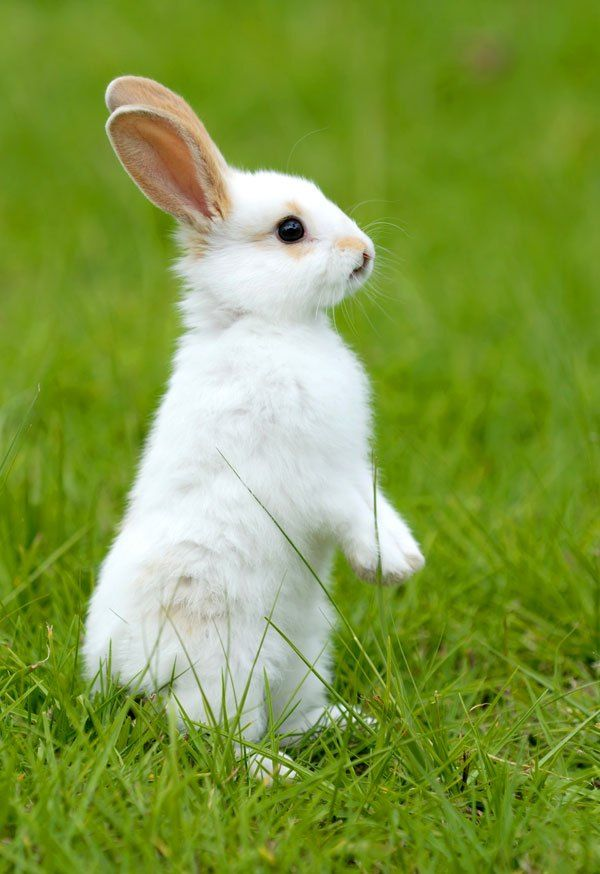

**AES-256-ECB**

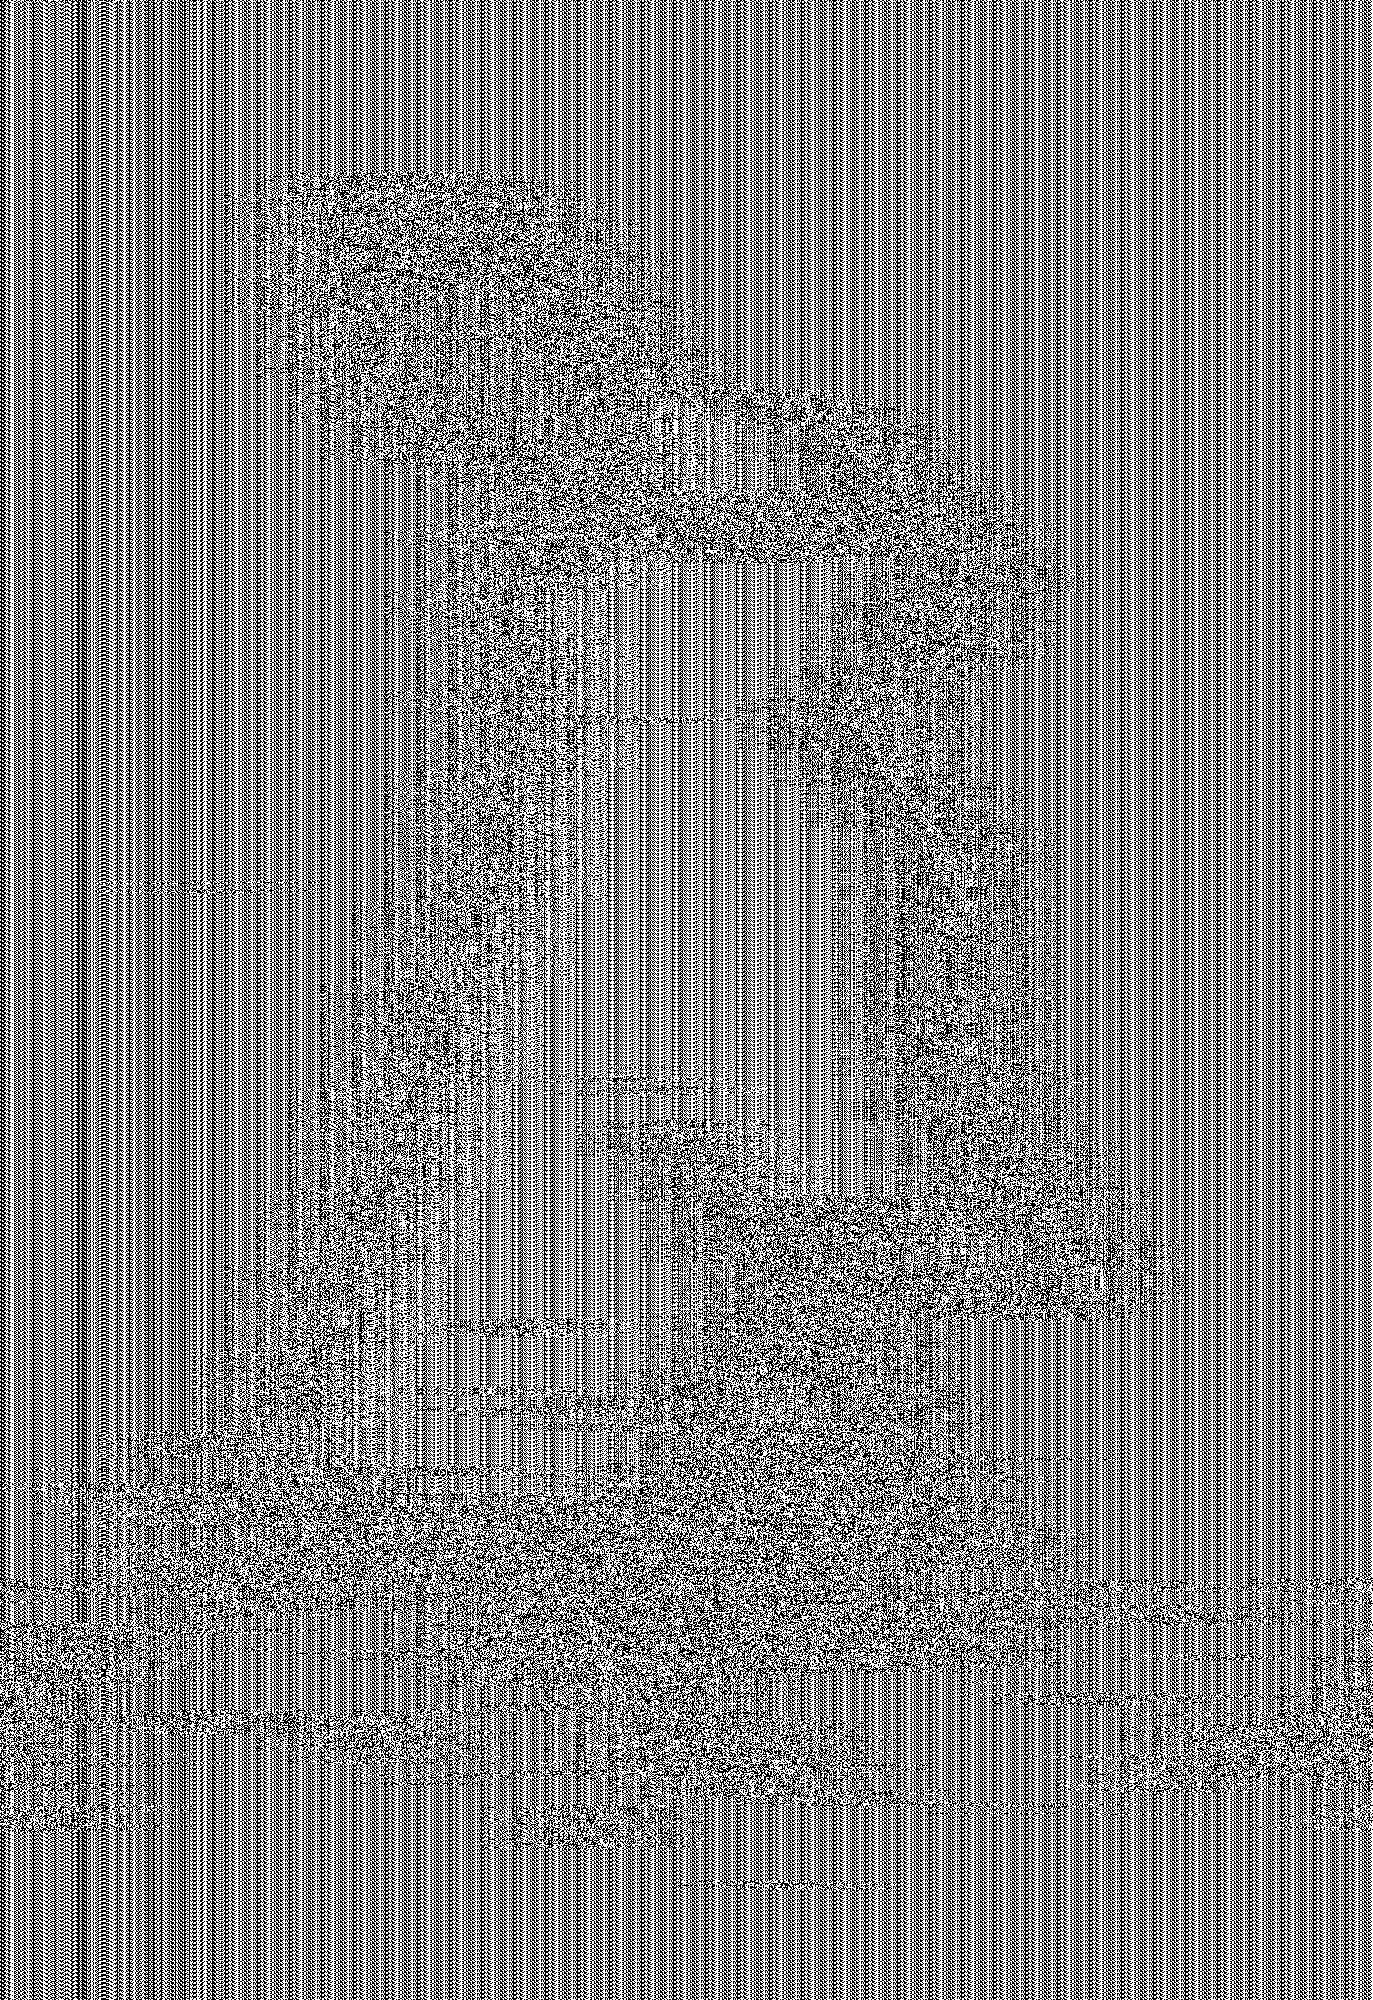


**AES-256-CBC**

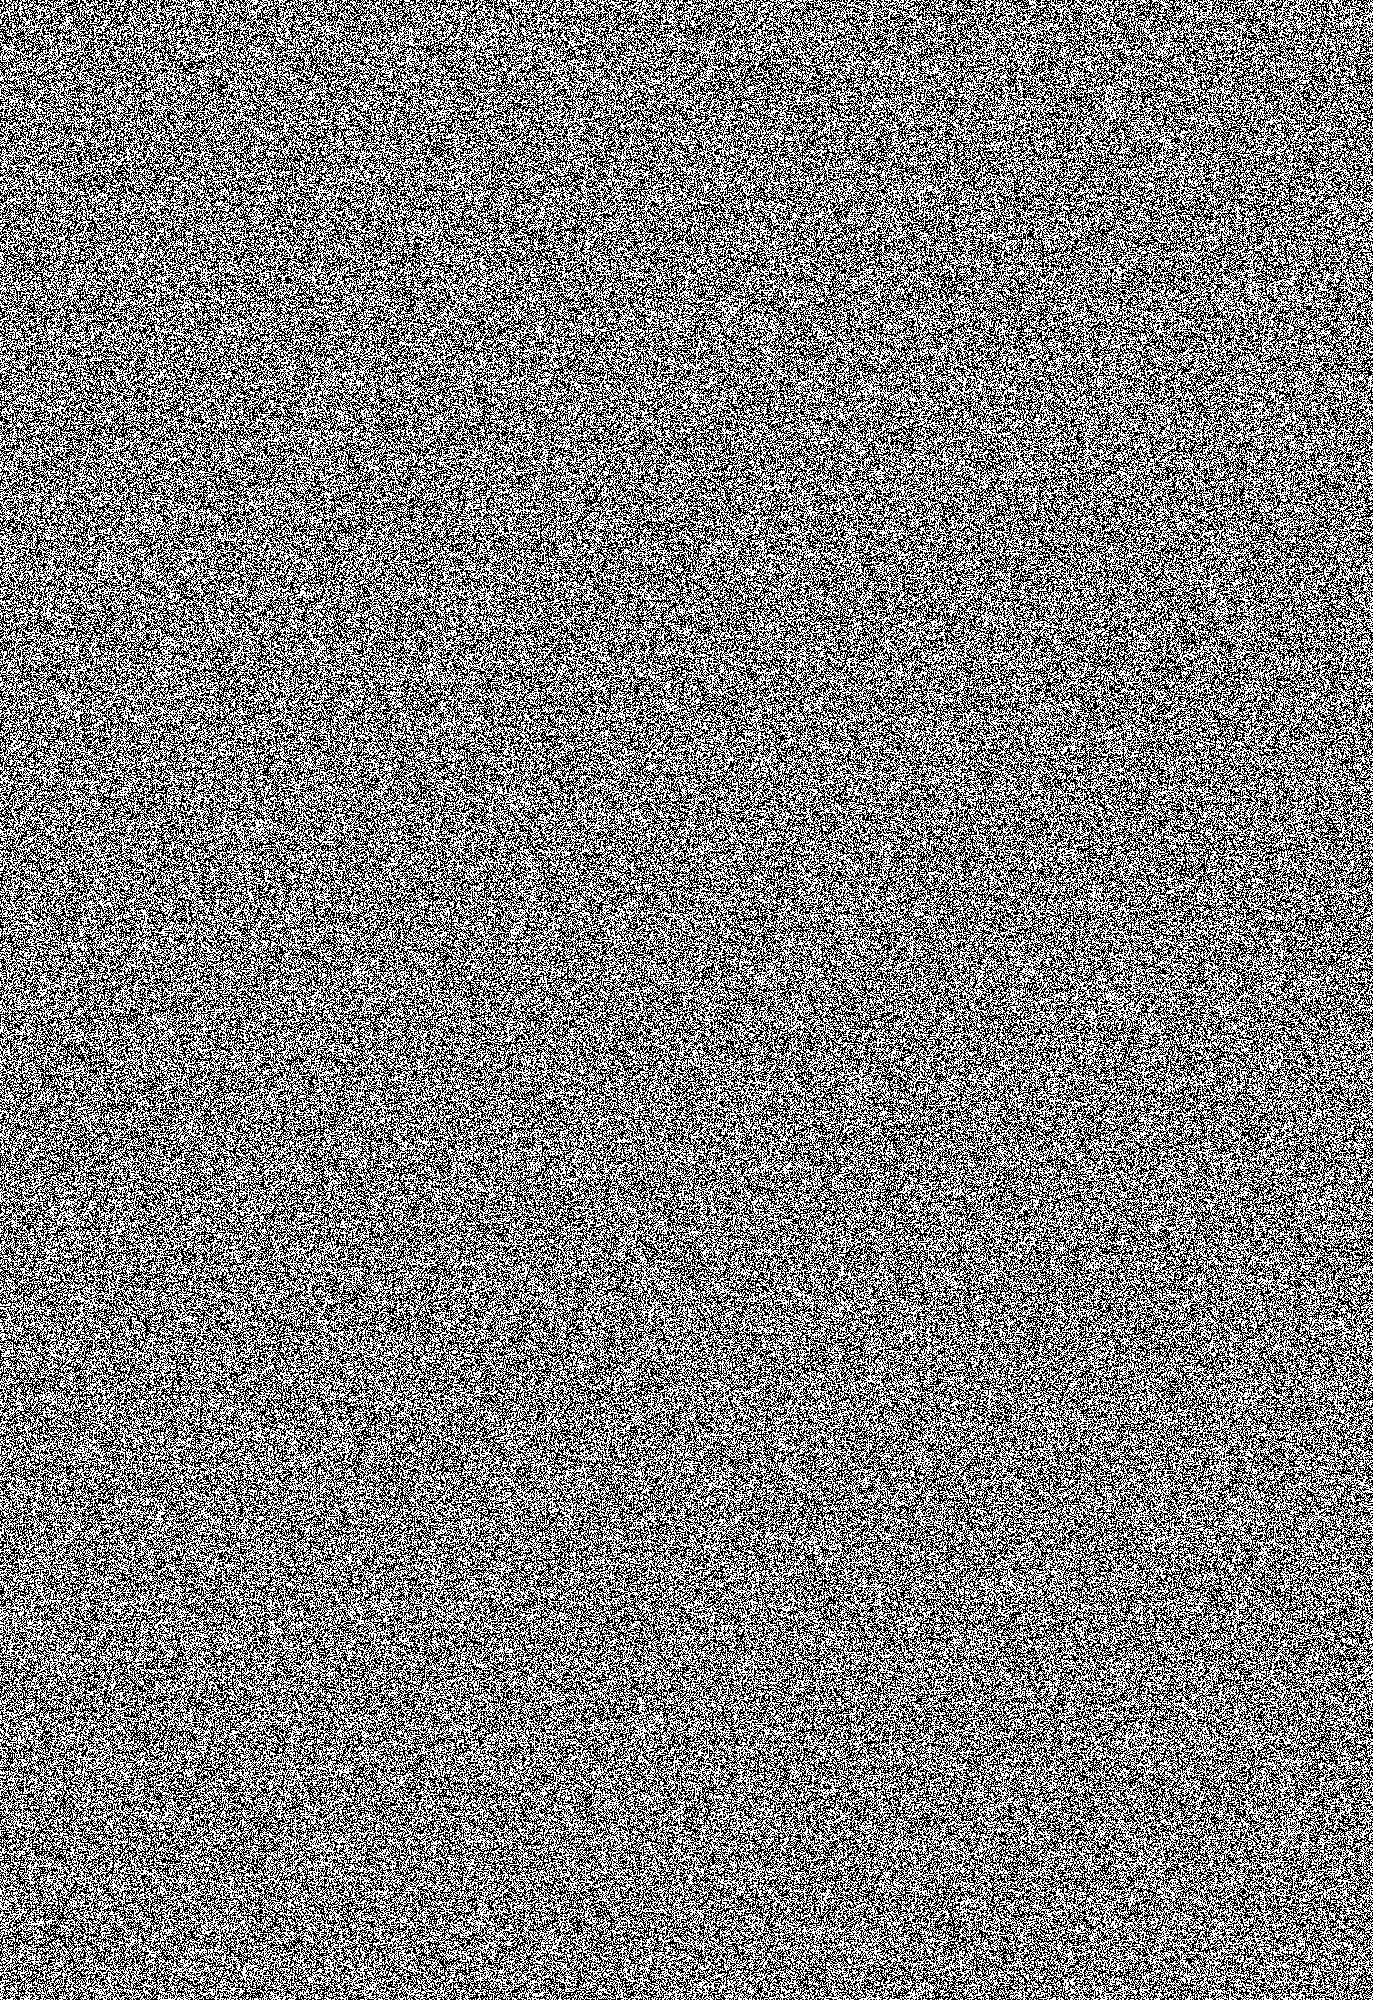

ECB: Fast, simple, but insecure (patterns leak).

CBC: More secure, prevents pattern leakage, but slower due to chaining.

If the result shows pattern leakage / repetition → suggest ECB.

If the result shows no patterns, ciphertext looks randomized → suggest CBC.

4.(Encryption Protocol - Digital Signature)

a. Measure the performance of a hash function (sha1), RC4, Blowfish and DSA.Outline your experimental design.

   (Please use OpenSSL for your measurement)

**SHA1**

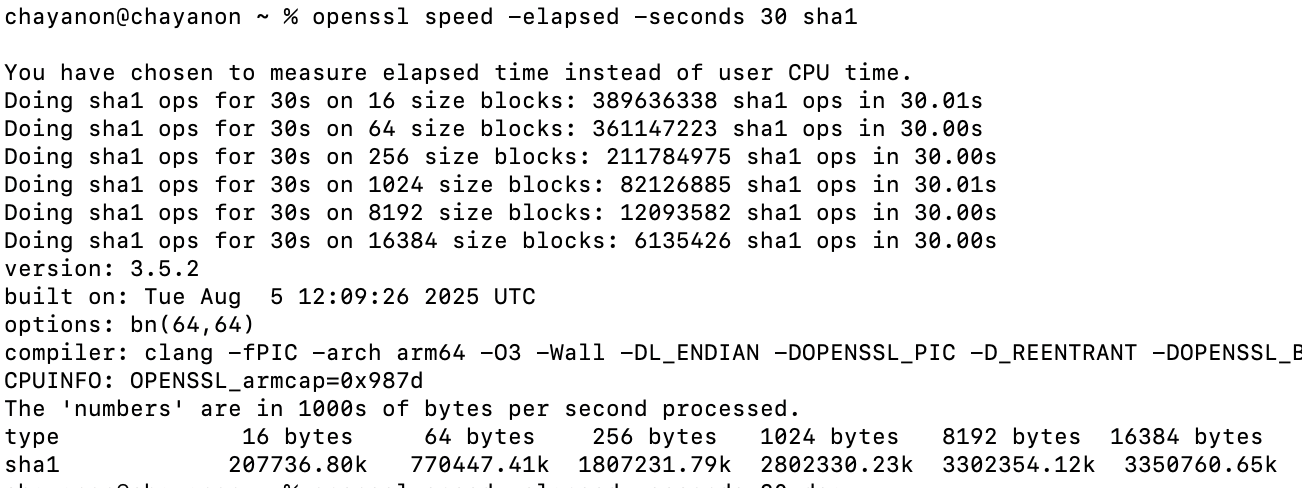

**RC4**

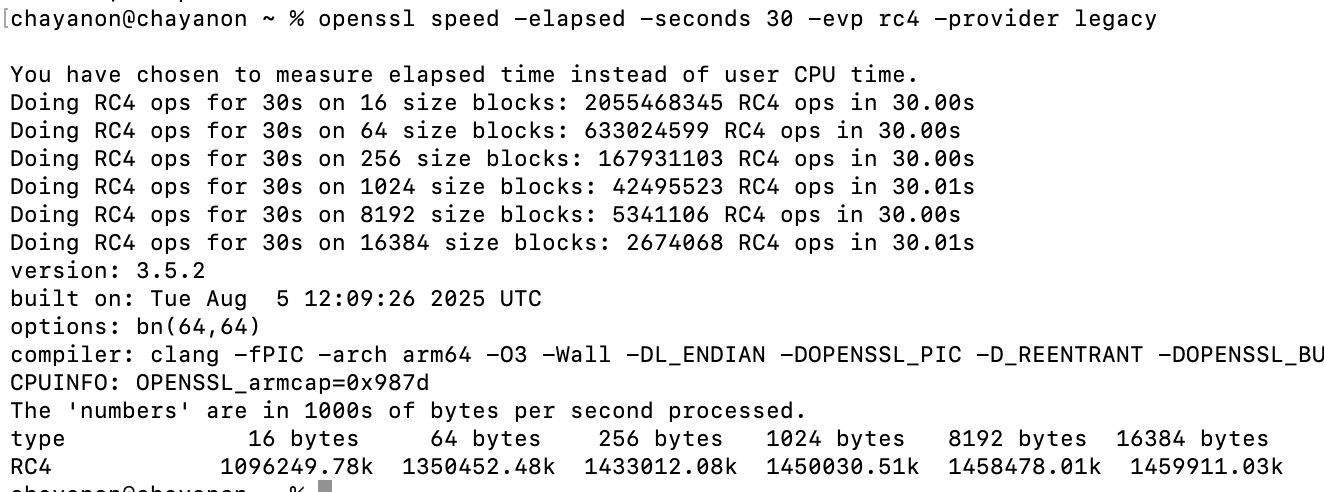

**Blowfish (BF-CBC)**

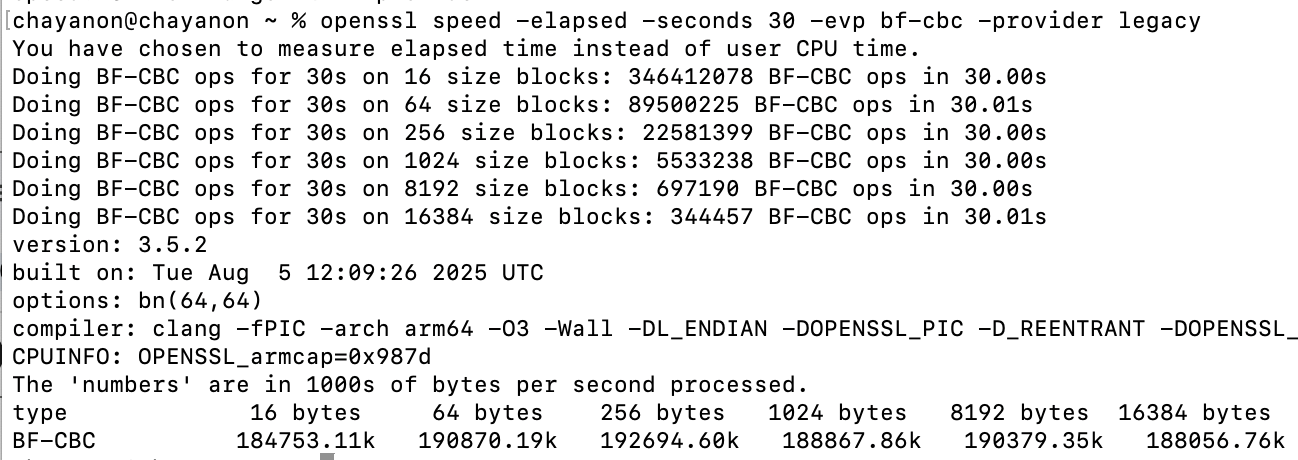

**DSA**

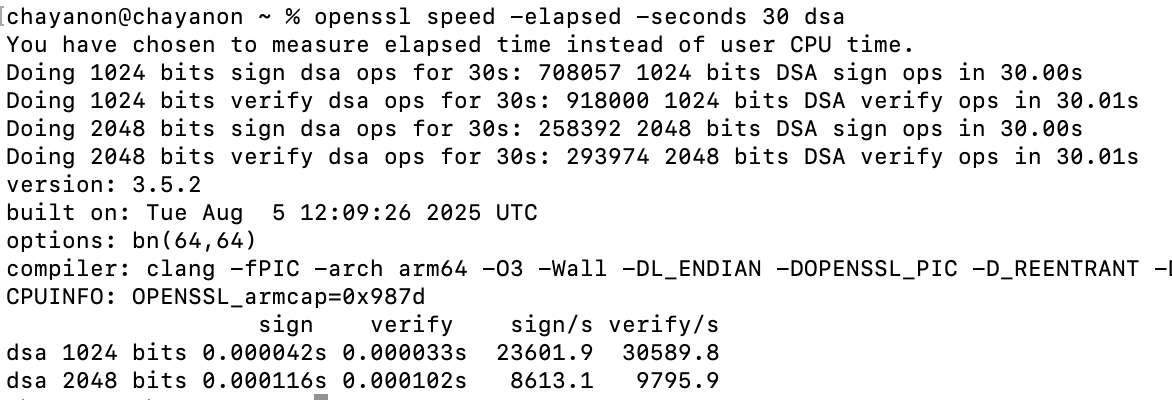


b.Comparing performance and security provided by each method.

Fastest → RC4 & SHA-1, but both are insecure today.

Secure but slower → Blowfish (moderate), DSA-2048 (for signatures).

Modern recommendation → Use AES (instead of RC4/Blowfish), SHA-256 (instead of SHA-1), and ECDSA/EdDSA (instead of DSA).

c.Explain the mechanism underlying Digital Signature. How does it combine the
strength and weakness of each encryption scheme?

A digital signature -> Hash (fast, integrity) + Asymmetric encryption (authenticity, non-repudiation).
It combines the speed of symmetric primitives with the trust model of asymmetric cryptography, while avoiding each one’s weaknesses when used alone.